> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Fashion-MNIST Foolbox Gradient Attack

## Get the previously saved Fashion-MNIST classifier.
Refer to [chapter3/fashionMNIST_classifier.ipnb](../chapter3/fashionMNIST_classifier.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
test_images = test_images/255.0


model = tf.keras.models.load_model("../models/fashion-MNIST.h5")
predictions = model.predict(test_images)

Instructions for updating:
Colocations handled automatically by placer.


## Select the original (non-adversarial) image


Prediction for original image: 6 Shirt


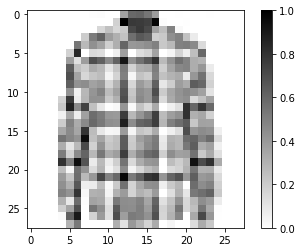

In [7]:
image_num = 7

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x = test_images[image_num]
y = np.argmax(predictions[image_num])
y_name = class_names[y]

print("Prediction for original image:", y, y_name) 

plt.imshow(x, cmap=plt.cm.binary)
plt.colorbar()

#plt.xticks([])
#plt.yticks([])
#plt.axis('off')


## Get a Foolbox model from our Keras one

Create a Foolbox model from our Keras one. 

In [4]:
import foolbox
from foolbox.models import KerasModel
fmodel = foolbox.models.TensorFlowModel.from_keras(model, bounds=(0, 255))

## Define the attack specificity

[foolbox.criteria](https://foolbox.readthedocs.io/en/latest/modules/criteria.html) defines the attach specificity (targeted versus untargeted) and the probability threshold required. 
 

In [5]:
attack_criterion = foolbox.criteria.Misclassification()
distance = foolbox.distances.Linfinity

## Define the attack method

In [6]:
attack = foolbox.attacks.GradientSignAttack(fmodel, criterion=attack_criterion, distance=distance)

## Run the attack

In [7]:
x_adv = attack(input_or_adv = x, label = y, unpack = False)

If the attack was successful, the images should be different. Take a look to see whether this is the case.

normalized Linf distance = 1.50e-04


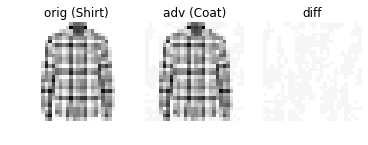

<Figure size 432x288 with 0 Axes>

In [17]:
if ((x_adv is None) or (np.array_equal(x, x_adv.image))):
    print("No adversarial example was found")
else:   
    preds = model.predict(np.array([x_adv.image]))

    plt.figure()

    # Plot the original image
    plt.subplot(1, 3, 1)
    title = "orig (" + y_name + ")"
    plt.title(title)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the adversarial image
    plt.subplot(1, 3, 2)
    title = "adv (" + class_names[np.argmax(preds[0])] + ")"
    plt.title(title)
    plt.imshow(x_adv.image, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the difference
    plt.subplot(1, 3, 3)
    plt.title('diff')
    difference = x_adv.image - x
    plt.imshow(difference, vmin=0, vmax=1, cmap=plt.cm.binary)
    plt.axis('off')

    print(x_adv.distance)
    plt.show()


In [9]:


#plt.savefig("ch6_code_foolbox_fgsm2.pdf", format="pdf", dpi=1000)